In [58]:
import pandas as pd
import numpy as np
df = pd.read_csv('mfsTxnData')
df.columns.values[0] = "TxnNo"
df

,TxnNo,Unnamed: 0.1,step,type,amount,numberOrig,oldbalanceOrig,newbalanceOrig,numberDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0,0,1,PAYMENT,9839.64,1727225098,170136.00,160296.36,1758381139,0.00,0.00,0,0
1,1,1,1,PAYMENT,1864.28,1355476622,21249.00,19384.72,1685833209,0.00,0.00,0,0
2,2,2,1,TRANSFER,181.00,1703468890,181.00,0.00,1728012013,0.00,0.00,1,0
3,3,3,1,CASH_OUT,181.00,1434065268,181.00,0.00,1771231476,21182.00,0.00,1,0
4,4,4,1,PAYMENT,11668.14,1458427098,41554.00,29885.86,1528871178,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361415,6362615,6362615,743,CASH_OUT,339682.13,1475249796,339682.13,0.00,1423472839,0.00,339682.13,1,0
6361416,6362616,6362616,743,TRANSFER,6311409.28,1326136205,6311409.28,0.00,1712920988,0.00,0.00,1,0
6361417,6362617,6362617,743,CASH_OUT,6311409.28,1627989373,6311409.28,0.00,1338054594,68488.84,6379898.11,1,0
6361418,6362618,6362618,743,TRANSFER,850002.52,1509160988,850002.52,0.00,1687667945,0.00,0.00,1,0


In [59]:
df.drop(df.columns[1], axis=1, inplace=True)

In [60]:
# which type of transactions are fraud
print (list(df.loc[df.isFraud == 1].type.drop_duplicates().values))

['TRANSFER', 'CASH_OUT']


In [61]:
#how many are frauds
dfFraudTransfer = df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')]
dfFraudCashout = df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')]
print ("transfer frauds are ", len(dfFraudTransfer), "and cashout frauds are ", len(dfFraudCashout)) 

transfer frauds are  4093 and cashout frauds are  4111


In [62]:
X = df.loc[(df.type == 'TRANSFER') | (df.type == 'CASH_OUT')]
randomState = 5
np.random.seed(randomState)
Y = X['isFraud']
del X['isFraud']
#drop the unnecessary columns
X = X.drop(['numberOrig', 'numberDest', 'isFlaggedFraud'], axis = 1)
# Binary-encoding of the type of transactions'
X.loc[X.type == 'TRANSFER', 'type'] = 0
X.loc[X.type == 'CASH_OUT', 'type'] = 1
#covert the data type
X.type = X.type.astype(int) 

In [63]:
X

,TxnNo,step,type,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest
2,2,1,0,181.00,181.00,0.0,0.00,0.00
3,3,1,1,181.00,181.00,0.0,21182.00,0.00
15,15,1,1,229133.94,15325.00,0.0,5083.00,51513.44
19,19,1,0,215310.30,705.00,0.0,22425.00,0.00
24,24,1,0,311685.89,10835.00,0.0,6267.00,2719172.89
...,...,...,...,...,...,...,...,...
6361415,6362615,743,1,339682.13,339682.13,0.0,0.00,339682.13
6361416,6362616,743,0,6311409.28,6311409.28,0.0,0.00,0.00
6361417,6362617,743,1,6311409.28,6311409.28,0.0,68488.84,6379898.11
6361418,6362618,743,0,850002.52,850002.52,0.0,0.00,0.00


In [64]:
Xfraud = X.loc[Y == 1]
XnotFraud = X.loc[Y == 0]

In [65]:
#find how many txn have 0 in oldbalanceDest and newbalanceDest
len(Xfraud.loc[(Xfraud.oldbalanceDest == 0) & (Xfraud.newbalanceDest == 0)])

4072

In [66]:
#how many of these have a txn amount? 
len(Xfraud.loc[(Xfraud.oldbalanceDest == 0) & (Xfraud.newbalanceDest == 0) & (Xfraud.amount)])

4066

In [67]:
#find the ratio of being fraud with these kind of txn 
(len(Xfraud.loc[(Xfraud.oldbalanceDest == 0) & (Xfraud.newbalanceDest == 0) & (Xfraud.amount)]))/(len(Xfraud))

0.4956118966357874

In [68]:
#find the ratio of NOT being fraud with these kind of txn
(len(XnotFraud.loc[(XnotFraud.oldbalanceDest == 0) & (XnotFraud.newbalanceDest == 0) & (XnotFraud.amount)]))/(len(XnotFraud))

0.00061733446203556

In [69]:
#similarly, find how many txn have 0 in oldbalanceOrig and newbalanceOrig and how many are fraud of them
(len(Xfraud.loc[(Xfraud.oldbalanceOrig == 0) & (Xfraud.newbalanceOrig == 0) & (Xfraud.amount)]))/(len(Xfraud))

0.0029254022428083864

In [70]:
#how many are not fraud 
(len(XnotFraud.loc[(XnotFraud.oldbalanceOrig == 0) & (XnotFraud.newbalanceOrig == 0) & (XnotFraud.amount)]))/(len(XnotFraud))

0.4737001036252921

In [71]:
X

,TxnNo,step,type,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest
2,2,1,0,181.00,181.00,0.0,0.00,0.00
3,3,1,1,181.00,181.00,0.0,21182.00,0.00
15,15,1,1,229133.94,15325.00,0.0,5083.00,51513.44
19,19,1,0,215310.30,705.00,0.0,22425.00,0.00
24,24,1,0,311685.89,10835.00,0.0,6267.00,2719172.89
...,...,...,...,...,...,...,...,...
6361415,6362615,743,1,339682.13,339682.13,0.0,0.00,339682.13
6361416,6362616,743,0,6311409.28,6311409.28,0.0,0.00,0.00
6361417,6362617,743,1,6311409.28,6311409.28,0.0,68488.84,6379898.11
6361418,6362618,743,0,850002.52,850002.52,0.0,0.00,0.00


In [72]:
#changing the value 0 to -1 when oldbalanceDest and newbalanceDest is 0, despite there is an amount 
X.loc[(X.oldbalanceDest == 0) & (X.newbalanceDest == 0) & (X.amount != 0), ['oldbalanceDest', 'newbalanceDest']] = - 1
#assigning a null value when oldbalanceOrig and newbalanceOrig is 0, despite there is an amount 
X.loc[(X.oldbalanceOrig == 0) & (X.newbalanceOrig == 0) & (X.amount != 0), ['oldbalanceOrig', 'newbalanceOrig']] = np.nan

In [73]:
X

,TxnNo,step,type,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest
2,2,1,0,181.00,181.00,0.0,-1.00,-1.00
3,3,1,1,181.00,181.00,0.0,21182.00,0.00
15,15,1,1,229133.94,15325.00,0.0,5083.00,51513.44
19,19,1,0,215310.30,705.00,0.0,22425.00,0.00
24,24,1,0,311685.89,10835.00,0.0,6267.00,2719172.89
...,...,...,...,...,...,...,...,...
6361415,6362615,743,1,339682.13,339682.13,0.0,0.00,339682.13
6361416,6362616,743,0,6311409.28,6311409.28,0.0,-1.00,-1.00
6361417,6362617,743,1,6311409.28,6311409.28,0.0,68488.84,6379898.11
6361418,6362618,743,0,850002.52,850002.52,0.0,-1.00,-1.00


In [74]:
#for feature engineering, we add the new features containing the errors in the balances of origin and destination
X['errorBalanceOrig'] = X.newbalanceOrig + X.amount - X.oldbalanceOrig
X['errorBalanceDest'] = X.oldbalanceDest + X.amount - X.newbalanceDest
X

,TxnNo,step,type,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,errorBalanceOrig,errorBalanceDest
2,2,1,0,181.00,181.00,0.0,-1.00,-1.00,0.00,1.810000e+02
3,3,1,1,181.00,181.00,0.0,21182.00,0.00,0.00,2.136300e+04
15,15,1,1,229133.94,15325.00,0.0,5083.00,51513.44,213808.94,1.827035e+05
19,19,1,0,215310.30,705.00,0.0,22425.00,0.00,214605.30,2.377353e+05
24,24,1,0,311685.89,10835.00,0.0,6267.00,2719172.89,300850.89,-2.401220e+06
...,...,...,...,...,...,...,...,...,...,...
6361415,6362615,743,1,339682.13,339682.13,0.0,0.00,339682.13,0.00,0.000000e+00
6361416,6362616,743,0,6311409.28,6311409.28,0.0,-1.00,-1.00,0.00,6.311409e+06
6361417,6362617,743,1,6311409.28,6311409.28,0.0,68488.84,6379898.11,0.00,1.000000e-02
6361418,6362618,743,0,850002.52,850002.52,0.0,-1.00,-1.00,0.00,8.500025e+05


In [75]:
#import librariries for data visualization 
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [76]:
limit = len(X)
def plotStrip(x, y, hue, figsize = (14, 9)):    
    fig = plt.figure(figsize = figsize)
    colours = plt.cm.tab10(np.linspace(0, 5, 9))
    with sns.axes_style('ticks'):
        ax = sns.stripplot(x, y,hue = hue, jitter = 0.4, marker = '*', size = 4, palette = colours)
        ax.set_xlabel('')
        ax.set_xticklabels(['genuine', 'fraudulent'], size = 16)
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)
        handles, labels = ax.get_legend_handles_labels()
        plt.legend(handles, ['Transfer', 'Cash out'], bbox_to_anchor=(1, 1), loc=2, borderaxespad=0, fontsize = 16);
    return ax 

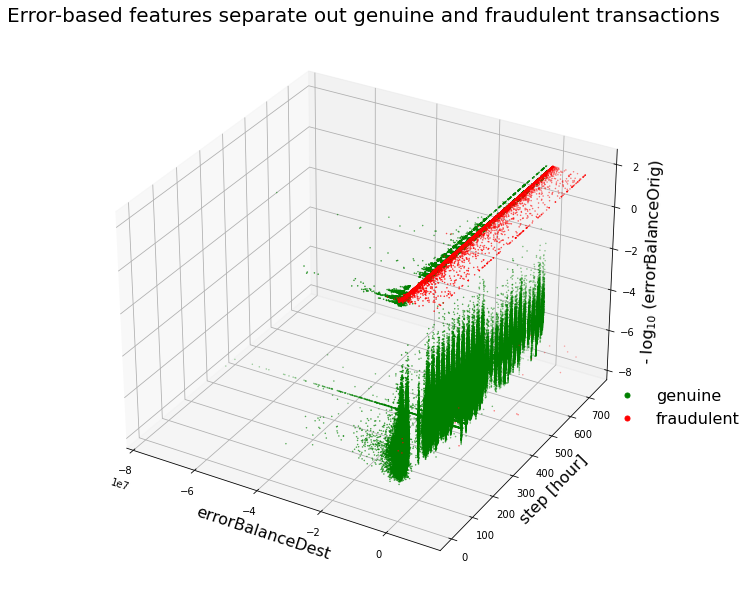

In [77]:
x = 'errorBalanceDest'
y = 'step'
z = 'errorBalanceOrig'
zOffset = 0.02
limit = len(X)

sns.reset_orig() # prevent seaborn from over-riding mplot3d defaults

fig = plt.figure(figsize = (10, 12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X.loc[Y == 0, x][:limit], X.loc[Y == 0, y][:limit], \
  -np.log10(X.loc[Y == 0, z][:limit] + zOffset), c = 'g', marker = '.', \
  s = 1, label = 'genuine')
    
ax.scatter(X.loc[Y == 1, x][:limit], X.loc[Y == 1, y][:limit], \
  -np.log10(X.loc[Y == 1, z][:limit] + zOffset), c = 'r', marker = '.', \
  s = 1, label = 'fraudulent')

ax.set_xlabel(x, size = 16); 
ax.set_ylabel(y + ' [hour]', size = 16); 
ax.set_zlabel('- log$_{10}$ (' + z + ')', size = 16)
ax.set_title('Error-based features separate out genuine and fraudulent transactions', size = 20)

plt.axis('tight')
ax.grid(1)

noFraudMarker = mlines.Line2D([], [], linewidth = 0, color='g', marker='.',
                          markersize = 10, label='genuine')
fraudMarker = mlines.Line2D([], [], linewidth = 0, color='r', marker='.',
                          markersize = 10, label='fraudulent')

plt.legend(handles = [noFraudMarker, fraudMarker], \
           bbox_to_anchor = (1.20, 0.38 ), frameon = False, prop={'size': 16});

In [78]:
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import average_precision_score
from xgboost.sklearn import XGBClassifier

In [79]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2, random_state = randomState)

In [80]:
weights = (Y == 0).sum() / (1.0 * (Y == 1).sum())
clf = XGBClassifier(max_depth = 3, scale_pos_weight = weights, n_jobs = 4)
probabilities = clf.fit(trainX, trainY).predict_proba(testX)
print(format(average_precision_score(testY, probabilities[:, 1])))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:57:27] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.016018331431036235


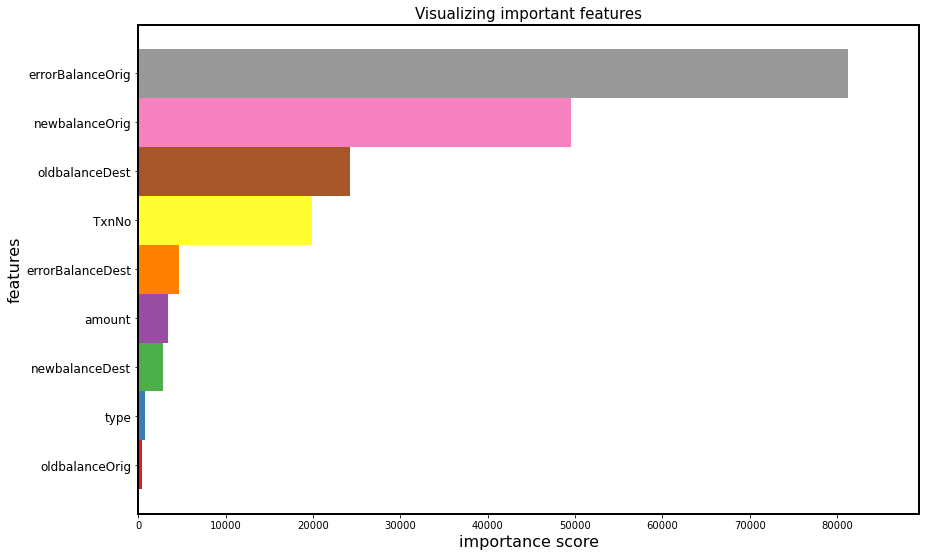

In [81]:
fig = plt.figure(figsize = (14, 9))
ax = fig.add_subplot(111)
colours = plt.cm.Set1(np.linspace(0, 1, 9))
ax = plot_importance(clf, height = 1, color = colours, grid = False, show_values = False, importance_type = 'cover', ax = ax);
for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)        
ax.set_xlabel('importance score', size = 16);
ax.set_ylabel('features', size = 16);
ax.set_yticklabels(ax.get_yticklabels(), size = 12);
ax.set_title('Visualizing important features', size = 15);

In [82]:
from xgboost import to_graphviz

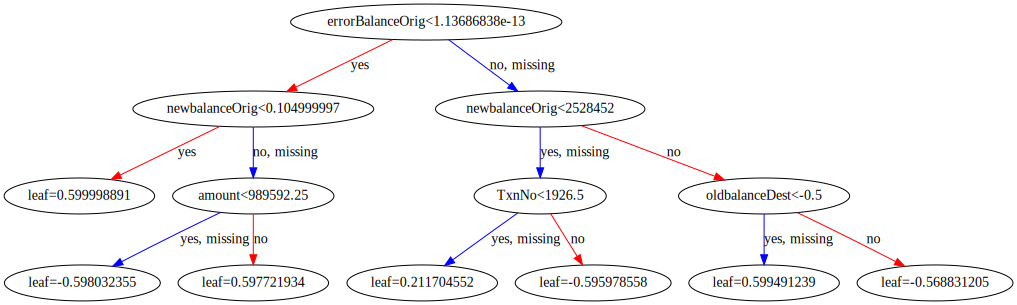

In [83]:
to_graphviz(clf)